<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [ ]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [ ]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

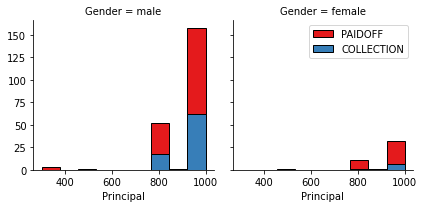

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

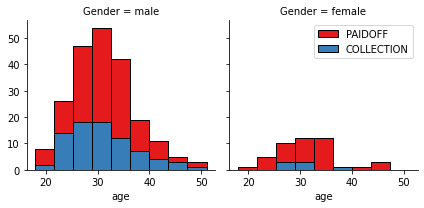

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


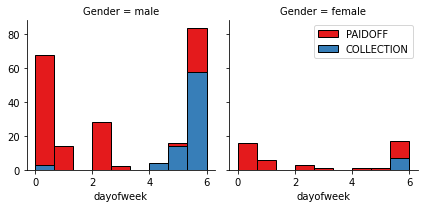

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical variables to binary variables and append them to the feature Data Frame


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

df['dayofweek'] = df['effective_date'].dt.dayofweek

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#df.head()
#df.info()

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

Feature.head()

X = Feature
y = df['loan_status'].values

#X[0:5]
#y[0:5]

X= preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

print('')
print('Data loaded ...')



Data loaded ...


In [2]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [4]:
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [2]:

import sys
#import numpy as np 
#import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print('')
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [3]:
k = 4

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh


KNeighborsClassifier(n_neighbors=4)

In [4]:
yhat_knn = neigh.predict(X_test)
yhat_knn[0:5]


array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [5]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))


Train set Accuracy:  0.8188405797101449
Test set Accuracy:  0.7


In [9]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)
    std_acc[n-1] = np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

array([0.65714286, 0.58571429, 0.74285714, 0.7       , 0.74285714,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.68571429,
       0.71428571, 0.72857143, 0.7       , 0.68571429])

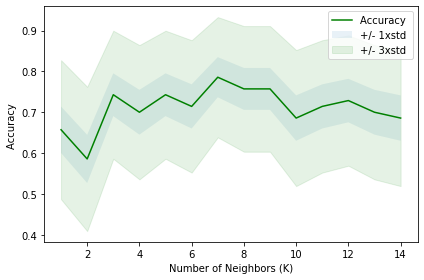

In [10]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [11]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 7


In [3]:
best_knn_model = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
best_knn_model


KNeighborsClassifier(n_neighbors=7)

In [17]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

print("Train set Accuracy: ", metrics.accuracy_score(y_train, best_knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, best_knn_model.predict(X_test)))

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_knn_model.predict(X_train), pos_label='PAIDOFF'))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_knn_model.predict(X_test), pos_label='PAIDOFF'))

print("Train set Accuracy (F1): ", f1_score(y_train, best_knn_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_knn_model.predict(X_test), average='weighted'))


Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7857142857142857
Train set Accuracy (Jaccard):  0.7773109243697479
Test set Accuracy (Jaccard):  0.7580645161290323
Train set Accuracy (F1):  0.8012459353917523
Test set Accuracy (F1):  0.7881875449203061


# Decision Tree


In [29]:
from sklearn import metrics

for md in range(1,10):
    dT = DecisionTreeClassifier(criterion="entropy", max_depth = md).fit(X_train,y_train)
    yhat_dT = dT.predict(X_test)
    print("For dept = {} the accuracy is {} ".format(dT, metrics.accuracy_score(y_test, yhat_dT)))


For dept = DecisionTreeClassifier(criterion='entropy', max_depth=1) the accuracy is 0.7857142857142857 
For dept = DecisionTreeClassifier(criterion='entropy', max_depth=2) the accuracy is 0.7857142857142857 
For dept = DecisionTreeClassifier(criterion='entropy', max_depth=3) the accuracy is 0.6142857142857143 
For dept = DecisionTreeClassifier(criterion='entropy', max_depth=4) the accuracy is 0.6142857142857143 
For dept = DecisionTreeClassifier(criterion='entropy', max_depth=5) the accuracy is 0.6428571428571429 
For dept = DecisionTreeClassifier(criterion='entropy', max_depth=6) the accuracy is 0.7714285714285715 
For dept = DecisionTreeClassifier(criterion='entropy', max_depth=7) the accuracy is 0.7571428571428571 
For dept = DecisionTreeClassifier(criterion='entropy', max_depth=8) the accuracy is 0.7571428571428571 
For dept = DecisionTreeClassifier(criterion='entropy', max_depth=9) the accuracy is 0.6571428571428571 


In [30]:
print("The best value of depth is d = 2 ")

The best value of depth is d = 2 


In [4]:
best_dT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 2).fit(X_train,y_train)
best_dT_model


DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [32]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

print("Train set Accuracy: ", metrics.accuracy_score(y_train, best_dT_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, best_dT_model.predict(X_test)))

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_dT_model.predict(X_train), pos_label='PAIDOFF'))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_dT_model.predict(X_test), pos_label='PAIDOFF'))

print("Train set Accuracy (F1): ", f1_score(y_train, best_dT_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_dT_model.predict(X_test), average='weighted'))


Train set Accuracy:  0.7427536231884058
Test set Accuracy:  0.7857142857142857
Train set Accuracy (Jaccard):  0.7427536231884058
Test set Accuracy (Jaccard):  0.7857142857142857
Train set Accuracy (F1):  0.6331163939859591
Test set Accuracy (F1):  0.6914285714285714


# Support Vector Machine


In [18]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 


SVC()

In [19]:
yhat_svm = clf.predict(X_test)
yhat_svm[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [20]:
from sklearn import metrics

for svmkern in ('linear', 'poly', 'rbf','sigmoid'):
    clf = svm.SVC(kernel = svmkern)
    clf = clf.fit(X_train, y_train) 
    yhat_svm = clf.predict(X_test)
    print("For kernel = {}, the F1 score is {} ".format(svmkern, f1_score(y_test, yhat_svm, average='weighted')))


For kernel = linear, the F1 score is 0.6914285714285714 
For kernel = poly, the F1 score is 0.7064793130366899 
For kernel = rbf, the F1 score is 0.7275882012724117 
For kernel = sigmoid, the F1 score is 0.6892857142857144 


In [21]:
print("The best kernel is 'rbf' ")

The best kernel is 'rbf' 


In [5]:
best_svm_model = svm.SVC(kernel = 'rbf').fit(X_train, y_train) 
best_svm_model


SVC()

In [23]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

print("Train set Accuracy: ", metrics.accuracy_score(y_train, best_svm_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, best_svm_model.predict(X_test)))

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_svm_model.predict(X_train), pos_label='PAIDOFF'))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_svm_model.predict(X_test), pos_label='PAIDOFF'))

print("Train set Accuracy (F1): ", f1_score(y_train, best_svm_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_svm_model.predict(X_test), average='weighted'))


Train set Accuracy:  0.782608695652174
Test set Accuracy:  0.7428571428571429
Train set Accuracy (Jaccard):  0.7560975609756098
Test set Accuracy (Jaccard):  0.7272727272727273
Train set Accuracy (F1):  0.7682165861513688
Test set Accuracy (F1):  0.7275882012724117


# Logistic Regression


In [24]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat_LR = LR.predict(X_test)
yhat_prob_LR = LR.predict_proba(X_test)


In [25]:
from sklearn import metrics

for LRsolver in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    
    LR = LogisticRegression(C=0.01, solver = LRsolver).fit(X_train, y_train)
    yhat_LR = LR.predict(X_test)
    yhat_prob_LR = LR.predict_proba(X_test)  

    print("For solver = {}, logloss is {} ".format(LRsolver, log_loss(y_test, yhat_prob_LR)))


For solver = lbfgs, logloss is 0.4920179847937498 
For solver = saga, logloss is 0.49202133387787256 
For solver = liblinear, logloss is 0.5772287609479654 
For solver = newton-cg, logloss is 0.492017801467927 
For solver = sag, logloss is 0.4920125167071311 


In [45]:
print("The best kernel is 'liblinear' ")

The best kernel is 'liblinear' 


In [6]:
best_LR_model = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train, y_train)
best_LR_model


LogisticRegression(C=0.01, solver='liblinear')

In [27]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

print("Train set Accuracy: ", metrics.accuracy_score(y_train, best_LR_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, best_LR_model.predict(X_test)))

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_LR_model.predict(X_train), pos_label='PAIDOFF'))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_LR_model.predict(X_test), pos_label='PAIDOFF'))

print("Train set Accuracy (F1): ", f1_score(y_train, best_LR_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_LR_model.predict(X_test), average='weighted'))

Train set Accuracy:  0.7572463768115942
Test set Accuracy:  0.6857142857142857
Train set Accuracy (Jaccard):  0.7351778656126482
Test set Accuracy (Jaccard):  0.6764705882352942
Train set Accuracy (F1):  0.7341146337750953
Test set Accuracy (F1):  0.6670522459996144


# Model Evaluation using Test set


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [7]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [8]:
test_df.shape

(54, 10)

In [14]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

df_loan_test = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')

df_loan_test['due_date'] = pd.to_datetime(df_loan_test['due_date'])
df_loan_test['effective_date'] = pd.to_datetime(df_loan_test['effective_date'])

df_loan_test['dayofweek'] = df_loan_test['effective_date'].dt.dayofweek

df_loan_test['weekend'] = df_loan_test['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df_loan_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#df.head()
#df.info()

Feature_loan_test = df_loan_test[['Principal','terms','age','Gender','weekend']]
Feature_loan_test = pd.concat([Feature_loan_test,pd.get_dummies(df_loan_test['education'])], axis=1)
Feature_loan_test.drop(['Master or Above'], axis = 1,inplace=True)

Feature_loan_test.head()

X_loan_test = Feature_loan_test
y_loan_test = df_loan_test['loan_status'].values

#X[0:5]
#y[0:5]

X_loan_test = preprocessing.StandardScaler().fit(X_loan_test).transform(X_loan_test)
#X[0:5]

print('')
print('Data loaded ...')



Data loaded ...


In [16]:
Feature_loan_test.shape

(54, 8)

In [17]:
X_loan_test.shape

(54, 8)

In [18]:

import sys
#import numpy as np 
#import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print('')
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Loan test set:', X_loan_test.shape,  y_loan_test.shape)    



Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
Loan test set: (54, 8) (54,)


In [40]:
acu1 = round(metrics.accuracy_score(y_loan_test, best_knn_model.predict(X_loan_test)), 2)

acu2 = round(metrics.accuracy_score(y_loan_test, best_dT_model.predict(X_loan_test)), 2)

acu3 = round(metrics.accuracy_score(y_loan_test, best_svm_model.predict(X_loan_test)), 2)

acu4 = round(metrics.accuracy_score(y_loan_test, best_LR_model.predict(X_loan_test)), 2)

acu_list = [acu1, acu2, acu3, acu4]
acu_list

[0.69, 0.74, 0.8, 0.74]

In [42]:
jacc1 = round(jaccard_score(y_loan_test, best_knn_model.predict(X_loan_test), pos_label='PAIDOFF'), 2) 

jacc2 = round(jaccard_score(y_loan_test, best_dT_model.predict(X_loan_test), pos_label='PAIDOFF'), 2) 

jacc3 = round(jaccard_score(y_loan_test, best_svm_model.predict(X_loan_test), pos_label='PAIDOFF'), 2) 

jacc4 = round(jaccard_score(y_loan_test, best_LR_model.predict(X_loan_test), pos_label='PAIDOFF'), 2) 

jacc_list = [jacc1, jacc2, jacc3, jacc4]
jacc_list

[0.67, 0.74, 0.78, 0.74]

In [44]:
f11 = round(f1_score(y_loan_test, best_knn_model.predict(X_loan_test), average='weighted'), 2)

f12 = round(f1_score(y_loan_test, best_dT_model.predict(X_loan_test), average='weighted'), 2)

f13 = round(f1_score(y_loan_test, best_svm_model.predict(X_loan_test), average='weighted'), 2)

f14 = round(f1_score(y_loan_test, best_LR_model.predict(X_loan_test), average='weighted'), 2)

f1_list = [f11, f12, f13, f14]
f1_list

[0.66, 0.63, 0.76, 0.66]

In [45]:

logl4 = round(log_loss(y_loan_test, best_LR_model.predict_proba(X_loan_test)), 2)
    
logl_list = ['NA', 'NA', 'NA', logl4]
logl_list

['NA', 'NA', 'NA', 0.57]

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | Logloss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


In [57]:
index = ['Jaccard', 'F1-score', 'Logloss']
columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']

accu_tbl = pd.DataFrame([jacc_list, f1_list, logl_list], index = index, columns = columns)

accu_tbl = accu_tbl.transpose()
accu_tbl.columns.name = 'Algorithm'
accu_tbl

Algorithm,Jaccard,F1-score,Logloss
KNN,0.67,0.66,NA
Decision Tree,0.74,0.63,NA
SVM,0.78,0.76,NA
Logistic Regression,0.74,0.66,0.57


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
